<a href="https://colab.research.google.com/github/redjules/gold-predicition/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [71]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [72]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [73]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [74]:
gold_data.shape

(2290, 6)

In [75]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [76]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [77]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:


1.Positive correlation


2.Negative correlation


In [78]:
correlation = gold_data.corr()

<Axes: >

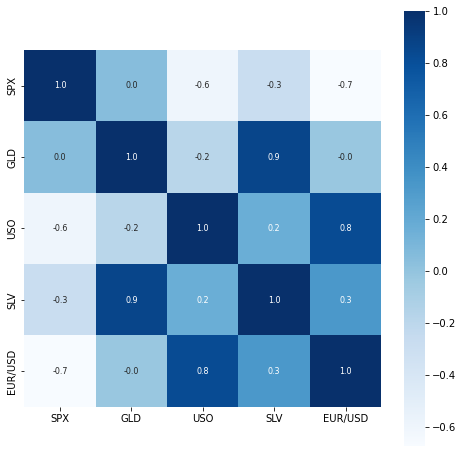

In [80]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [81]:
#correlation value of GLD
print(correlation['GLD'])



SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-82-09c262635c5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

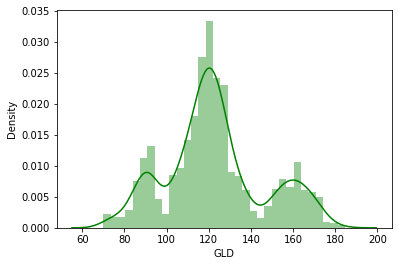

In [82]:
#checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')


Splitting the features and Target

In [84]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [85]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [86]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

Model training: Random Forest Regressor

In [89]:
regressor = RandomForestRegressor(n_estimators=100)

In [90]:
#training the model
regressor.fit(X_train,Y_train)


RandomForestRegressor()

Model Evaluation

In [91]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [92]:
print(test_data_prediction)


[168.50639867  81.73789998 116.07859987 127.68210101 120.76130147
 154.86249768 150.48129846 126.14590074 117.57099868 126.0158006
 116.96090075 171.16320069 141.35209815 167.95399926 115.17660019
 117.59510049 138.79840332 170.0600004  159.70140311 162.26650043
 155.06359946 125.6853004  175.98960032 157.23500353 125.31820034
  93.96129961  78.13729987 120.63500009 119.13269957 167.21160032
  88.10100092 125.09179949  91.27980083 117.58350024 121.05999916
 136.92370108 115.46040142 115.0940008  147.19319946 107.45040074
 104.33860257  87.12019791 126.49590043 117.9195001  152.70459888
 119.72970008 108.39049974 107.99329812  93.25830075 127.11709783
  75.03140034 113.52379929 121.32220057 111.21109893 118.90239899
 120.85809891 158.84260079 166.28010163 146.94349652  85.76439844
  94.26150017  86.7394988   90.66279983 119.06930084 126.41450089
 127.48379987 170.18059975 122.35229934 117.22429895  98.66400081
 168.35960219 142.81069833 132.07530221 121.12790231 120.96409912
 119.866300

In [94]:
#R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error: ', error_score)

R squared error:  0.9898826144644163


Compare the actual values and the predicted values in a plot

In [95]:
Y_test = list(Y_test)

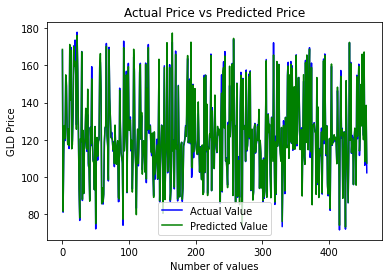

In [98]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()